 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [35]:
#imports all dependencies and libraries
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
#library for visualization
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [92]:
#function to read a csv file and set the index and parse the date time format
def fetch_data(path, index_col):
    return pd.read_csv(path, parse_dates=True, infer_datetime_format=True, index_col = index_col)

#set the path for file locations
whale_path = Path("./Resources/whale_returns.csv")
algo_path  = Path("./Resources/algo_returns.csv")
sp500_path = Path("./Resources/sp500_history.csv")


## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [93]:
# Read whale returns data from CSV file parse dates and infer date time True, set Date col as index
whale_data = fetch_data(whale_path,'Date') 
whale_data.sort_index(inplace = True)
whale_data.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
#check for NaN values
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
#drop the NaN rows of data
whale_data.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [94]:
# Read algorithmic returns data from CSV file parse dates and infer date time True, set Date col as index
algo_data = fetch_data(algo_path, 'Date')
#sort the data on Index
algo_data.sort_index(inplace = True)
#check for data from the Dataframe
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
#check for NaN values
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [140]:
# Drop nulls (NaN values)
algo_data.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [95]:
# Read S&P 500 Closing Prices
sp500_data = fetch_data(sp500_path, 'Date')

In [96]:
#sort the data on Index
sp500_data.sort_index(inplace = True)

In [97]:
#check for data from the Dataframe
sp500_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [43]:
# Strip the Close data column for '$' and convert the string data to float data type
sp500_data['Close'] = sp500_data.Close.str.replace('$', '').astype(float)

<ipython-input-43-f4ff70c7d04e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_data['Close'] = sp500_data.Close.str.replace('$', '').astype(float)


In [44]:
#check for data from the Dataframe
sp500_data.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [45]:
# Calculate Daily Returns on SP500 data
sp500_daily_ret = sp500_data.pct_change()
sp500_daily_ret.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [139]:
#check for any nulls (NaN values)
sp500_daily_ret.isnull().sum()
# Drop nulls from daily returns
sp500_daily_ret.dropna().head()

,SP500 Daily Retun
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [47]:
# Rename `Close` Column to SP500 Daily Retun
sp500_daily_ret.rename({'Close' : 'SP500 Daily Retun'}, axis=1, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [48]:
# Concatenate Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_daily_returns = pd.concat([whale_data, algo_data, sp500_daily_ret], axis = "columns", join = "inner")
#check for any nulls (NaN values)
combined_daily_returns.isnull().sum()
# Drop nulls from daily returns
combined_daily_returns.dropna(inplace = True)

In [49]:
combined_daily_returns.head()
combined_daily_returns.sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Retun
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All portfolios'}, xlabel='Date'>

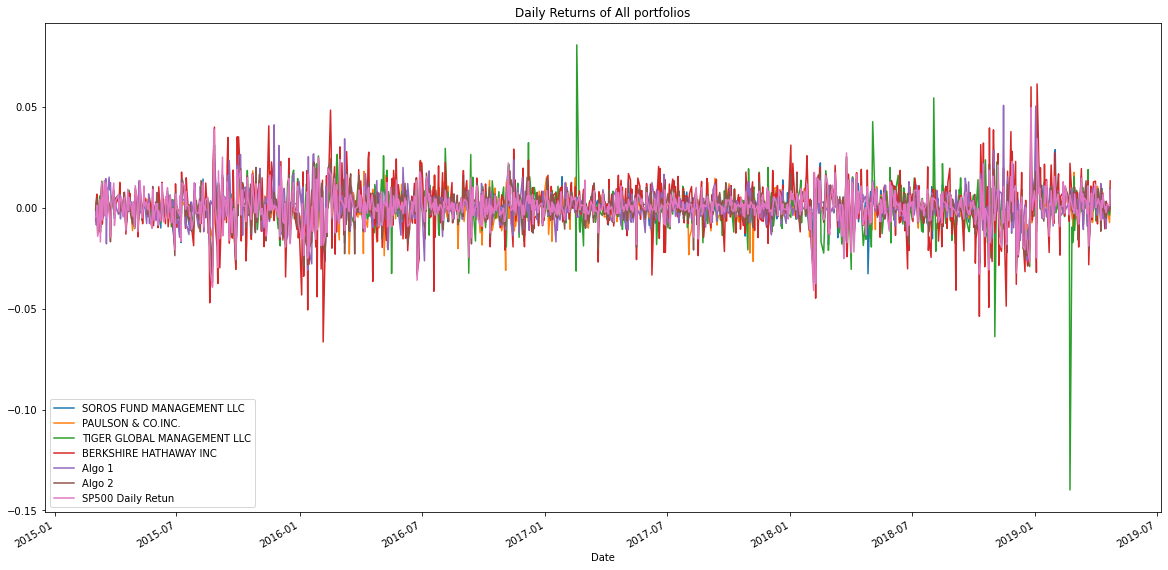

In [50]:
# Plot daily returns of combined data of all portfolios

combined_daily_returns.plot(legend = True, figsize = (20,10), title = "Daily Returns of All portfolios")

#### Calculate and Plot cumulative returns.

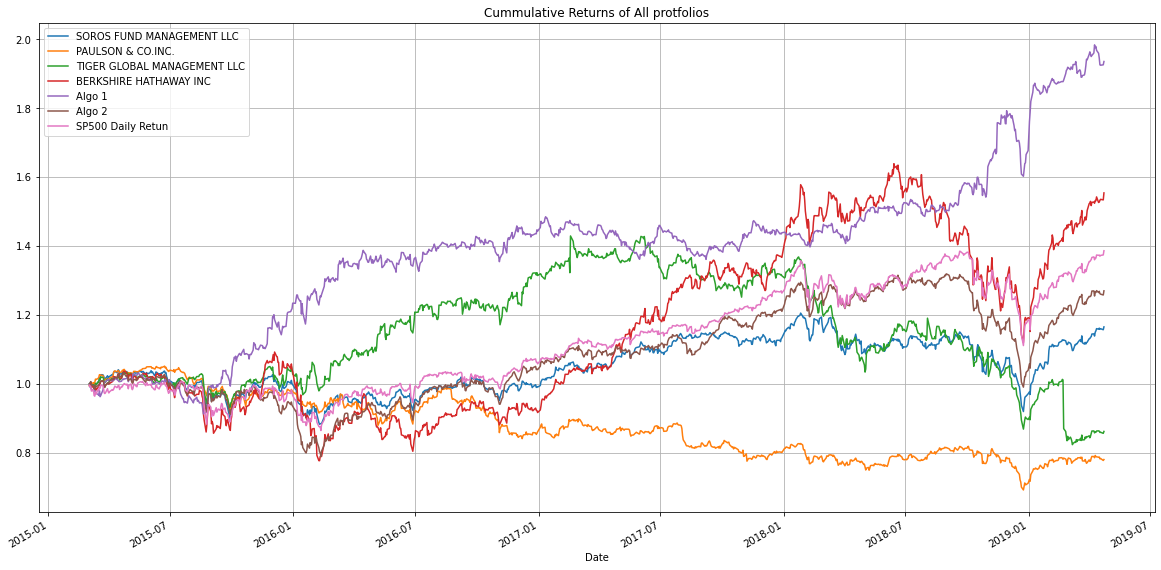

In [51]:
# Calculate cumulative returns of all portfolios
combined_cum_ret = (1 + combined_daily_returns).cumprod().plot(legend = True, figsize = (20,10), title = "Cummulative Returns of All protfolios", grid = True)

<AxesSubplot:title={'center':'Cummulative Returns of Whale protfolios'}, xlabel='Date'>

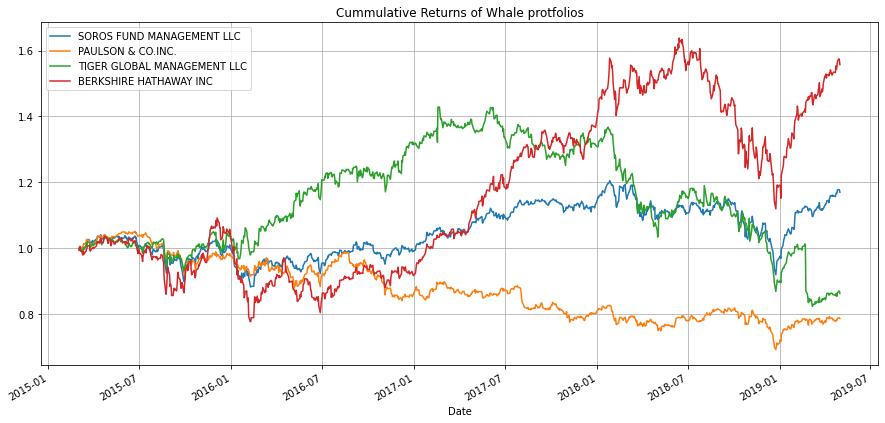

In [52]:
#Cummulative Retrun for whale portfolio
cum_whale_ret = (1 + whale_data).cumprod()
# Plot cumulative returns
cum_whale_ret.plot(legend = True, title = "Cummulative Returns of Whale protfolios", figsize=(15,7), grid = True)

---

<AxesSubplot:xlabel='Date'>

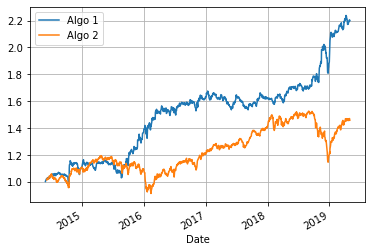

In [53]:
#Cummulative Retrun for whale portifolio
cum_algo_ret = (1 + algo_data).cumprod()
# Plot cumulative returns
cum_algo_ret.plot(legend = True, grid = True)

<AxesSubplot:xlabel='Date'>

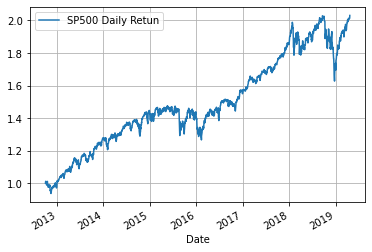

In [54]:
#Cummulative Retrun for whale portifolio
cum_sp500_ret = (1 + sp500_daily_ret).cumprod()
# Plot cumulative returns
cum_sp500_ret.plot(legend = True, grid = True)

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

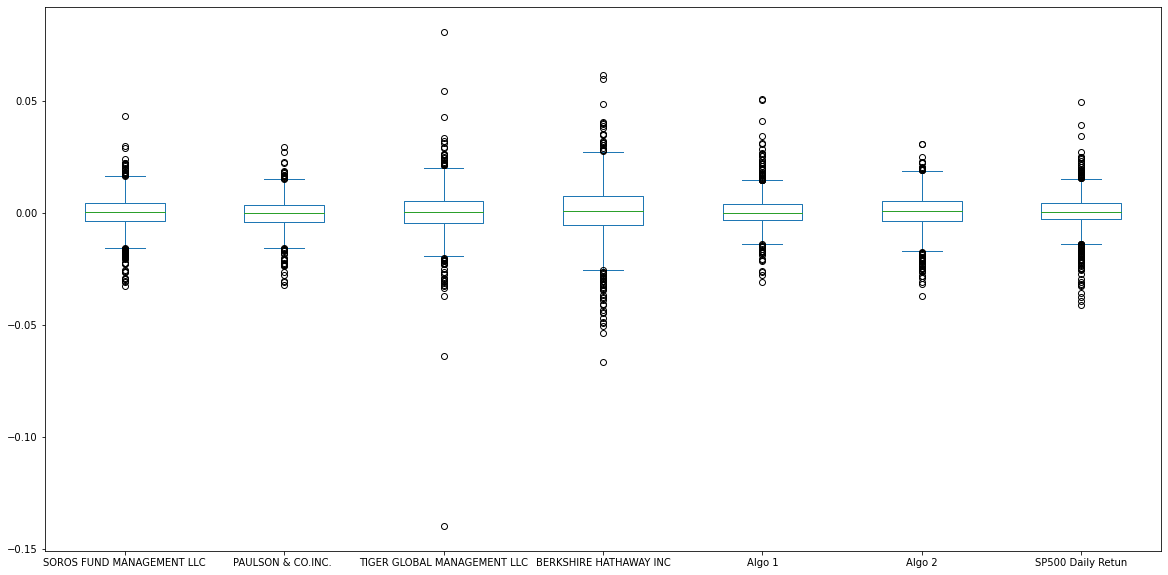

In [55]:
# Box plot to visually show risk
combined_daily_returns.plot(kind = 'box', figsize = (20,10), legend = True)

### Calculate Standard Deviations

In [68]:
# Calculate the daily standard deviations of combined data of all portfolios
std_combined_port = combined_daily_returns.std()
std_combined_port

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Daily Retun              0.008554
dtype: float64

<AxesSubplot:>

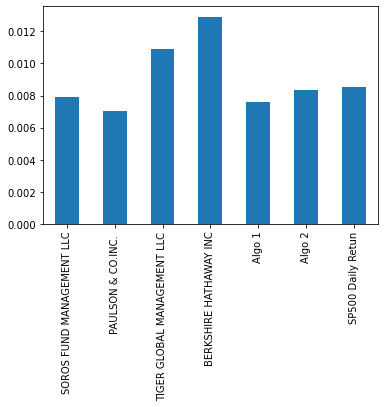

In [82]:
std_combined_port.plot(kind='bar')

### Determine which portfolios are riskier than the S&P 500

In [57]:
# Calculate  the daily standard deviation of S&P 500
std_dev_sp500 = sp500_daily_ret.std()

In [58]:
std_dev_sp500

SP500 Daily Retun    0.008111
dtype: float64

In [75]:
#read the std for SP500 from std all combined portfolios
for port,stddev in std_combined_port.items():
    if port == "SP500 Daily Retun":
        sp500_std_dev = stddev

In [86]:
#risk analysis using a dict and comparing the data in std_combined_port
risk_analysis={}
for key, value in std_combined_port.items():
    sp_dev = value
    if sp500_std_dev == sp_dev:
        risk_analysis[key] = "SP500 Benchmark"
    elif sp500_std_dev < sp_dev:
        risk_analysis[key] = "Riskier than SP500"
    else:
        risk_analysis[key] = "Not Riskier than SP500"
        
print(risk_analysis)

{'SOROS FUND MANAGEMENT LLC': 'Not Riskier than SP500', 'PAULSON & CO.INC. ': 'Not Riskier than SP500', 'TIGER GLOBAL MANAGEMENT LLC': 'Riskier than SP500', 'BERKSHIRE HATHAWAY INC': 'Riskier than SP500', 'Algo 1': 'Not Riskier than SP500', 'Algo 2': 'Not Riskier than SP500', 'SP500 Daily Retun': 'SP500 Benchmark'}


In [80]:
#risk analysis using a list and comparing the data in std_combined_port        
pname = []
risky = []
risky_df = pd.DataFrame(columns = ['Portfolio Name', 'Risky'])

for index, value in std_combined_port.items():
    sp_dev = value
        
    if sp500_std_dev == sp_dev:
        pname.append(index)
        risky.append("SP500 Benchmark")
    elif sp500_std_dev < sp_dev:
        pname.append(index)
        risky.append("Riskier than SP500")
    else:
        pname.append(index)
        risky.append("Not Riskier than SP500")
risky_df['Portfolio Name'] = pname
risky_df['Risky'] = risky
risky_df

,Portfolio Name,Risky
0,SOROS FUND MANAGEMENT LLC,Not Riskier than SP500
1,PAULSON & CO.INC.,Not Riskier than SP500
2,TIGER GLOBAL MANAGEMENT LLC,Riskier than SP500
3,BERKSHIRE HATHAWAY INC,Riskier than SP500
4,Algo 1,Not Riskier than SP500
5,Algo 2,Not Riskier than SP500
6,SP500 Daily Retun,SP500 Benchmark


### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
ann_combined_std_dev = std_combined_port * np.sqrt(252)
ann_combined_std_dev

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Daily Retun              0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

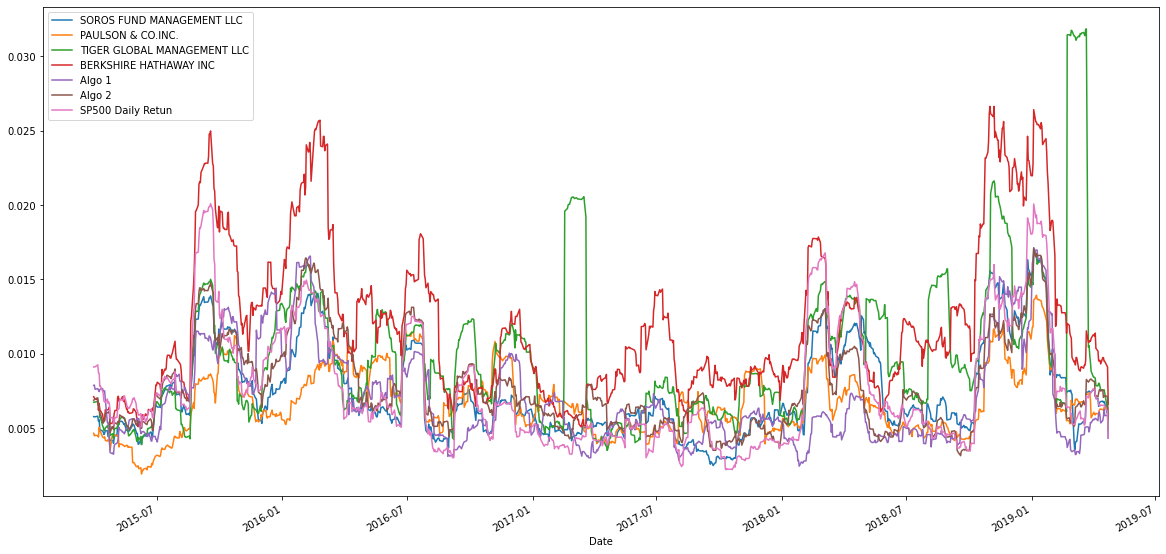

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
roll_std_dev_21 = combined_daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
roll_std_dev_21.plot(figsize = (20,10))

### Calculate and plot the correlation

In [30]:
# Calculate the correlation of combined daily returns
corr_daily_ret = combined_daily_returns.corr()
# Display de correlation matrix
corr_daily_ret

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Retun
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500 Daily Retun,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Algo 2 180 days Beta trend'}, xlabel='Date'>

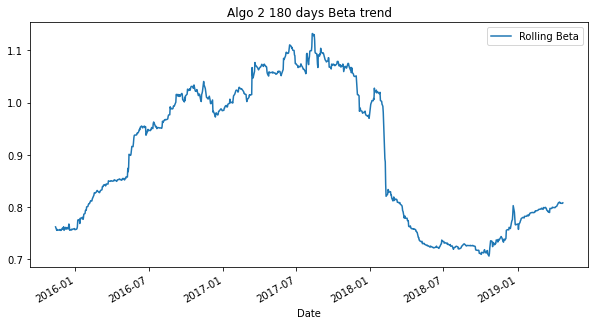

In [87]:
# Calculate covariance of a single portfolio
covariance_algo2 = combined_daily_returns['Algo 2'].cov(combined_daily_returns['SP500 Daily Retun'])

# Calculate variance of S&P 500
variance_sp500 = combined_daily_returns['SP500 Daily Retun'].var()

# Computing beta covariance/variance
algo2_beta = covariance_algo2/variance_sp500

# Calculate covariance of a single portfolio for rolling 180 days
covariance_algo2_180 = combined_daily_returns['Algo 2'].rolling(window=180).cov(combined_daily_returns['SP500 Daily Retun'])

# Calculate variance of S&P 500 for rolling 180 days
variance_sp500_180 = combined_daily_returns['SP500 Daily Retun'].rolling(window=180).var()

# Computing beta for rolling 180 days
algo2_beta_180 = covariance_algo2_180/variance_sp500_180

# Plot beta trend for 180 days
algo2_beta_180.plot(figsize = (10,5), title = 'Algo 2 180 days Beta trend', legend = True, label = 'Rolling Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

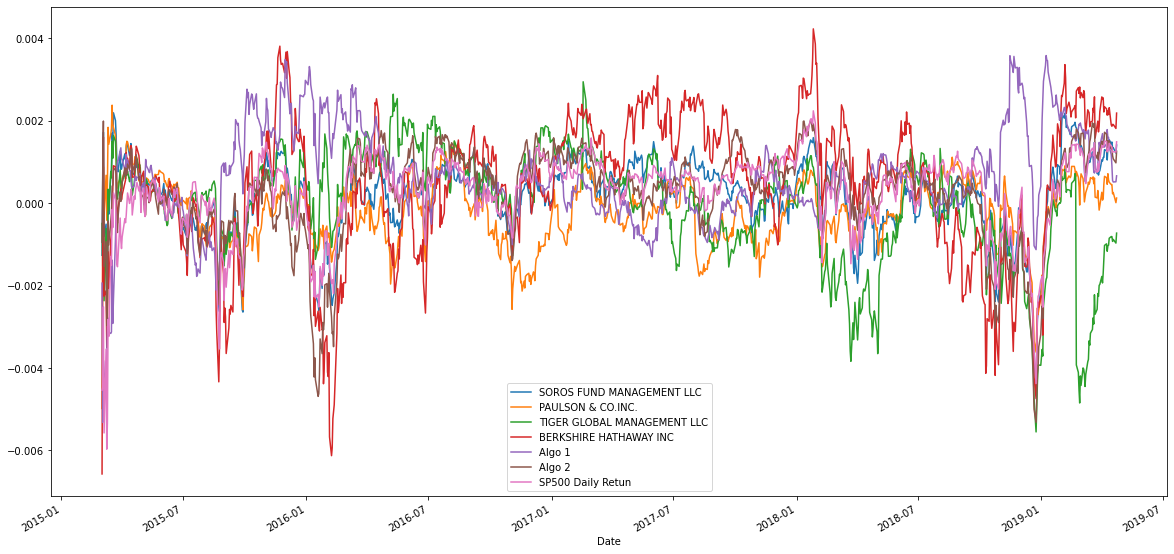

In [88]:
# Use `ewm` to calculate the rolling window for halflife of 21 days
combined_daily_returns.ewm(halflife = 21).mean().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [102]:
# Annualized Sharpe Ratios multiply with 
annual_sharpe_ratio = (combined_daily_returns.mean() * 252)/ (combined_daily_returns.std()  * np.sqrt(252))


<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

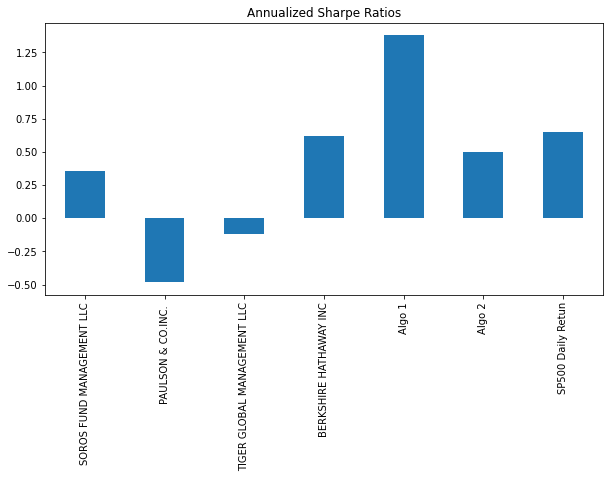

In [103]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratio.plot(kind = 'bar', figsize = (10,5), title = 'Annualized Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [104]:
# Reading data from 1st stock
goog_path = Path("./Resources/goog_historical.csv")
goog_data = fetch_data(goog_path, 'Trade DATE')
goog_data.count()

Symbol    250
NOCP      250
dtype: int64

In [105]:
# Reading data from 2nd stock
aapl_path  = Path("./Resources/aapl_historical.csv")
aapl_data = fetch_data(aapl_path, 'Trade DATE')
aapl_data.count()

Symbol    250
NOCP      250
dtype: int64

In [124]:
# Reading data from 3rd stock
cost_path = Path("./Resources/cost_historical.csv")
cost_data = fetch_data(cost_path, 'Trade DATE')
cost_data.count()

Symbol    250
NOCP      250
dtype: int64

In [125]:
# Combine all stocks in a single DataFrame
new_port_comb = pd.concat([goog_data,aapl_data,cost_data], axis = "rows", join = "outer")
new_port_comb.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [126]:
# Reset Date index
new_port_comb.reset_index().head()

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40


In [127]:
# Reorganize portfolio data by having a column per symbol data frame pivot function
new_port_comb = new_port_comb.pivot(columns = "Symbol", values = "NOCP")
new_port_comb.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [115]:
# Calculate daily returns
new_port_comb_ret = new_port_comb.pct_change()
# Drop NAs
new_port_comb_ret.dropna(inplace = True)
# Display sample data
new_port_comb_ret.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [128]:
# Set equal weights
weights = [1/3, 1/3, 1/3]

# Calculate weight portfolio return
weighted_new_port = new_port_comb_ret.dot(weights)
# Display sample data
weighted_new_port.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [129]:
# Join your returns DataFrame to the original returns DataFrame
all_port_ret = pd.concat([combined_daily_returns, weighted_new_port], axis = 1, join = 'inner')
all_port_ret.rename(columns = {all_port_ret.columns[-1]: "My port"}, inplace = True)
all_port_ret.sample()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Retun,My port
2019-04-10,0.009808,0.008366,0.002912,0.005269,-0.004221,0.009632,0.003478,0.004191


In [130]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_port_ret.dropna(inplace = True)
all_port_ret.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500 Daily Retun              0
My port                        0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [131]:
# Calculate the annualized `std`
annual_std_ret = all_port_ret.std() * np.sqrt(252)
annual_std_ret

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP500 Daily Retun              0.152054
My port                        0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

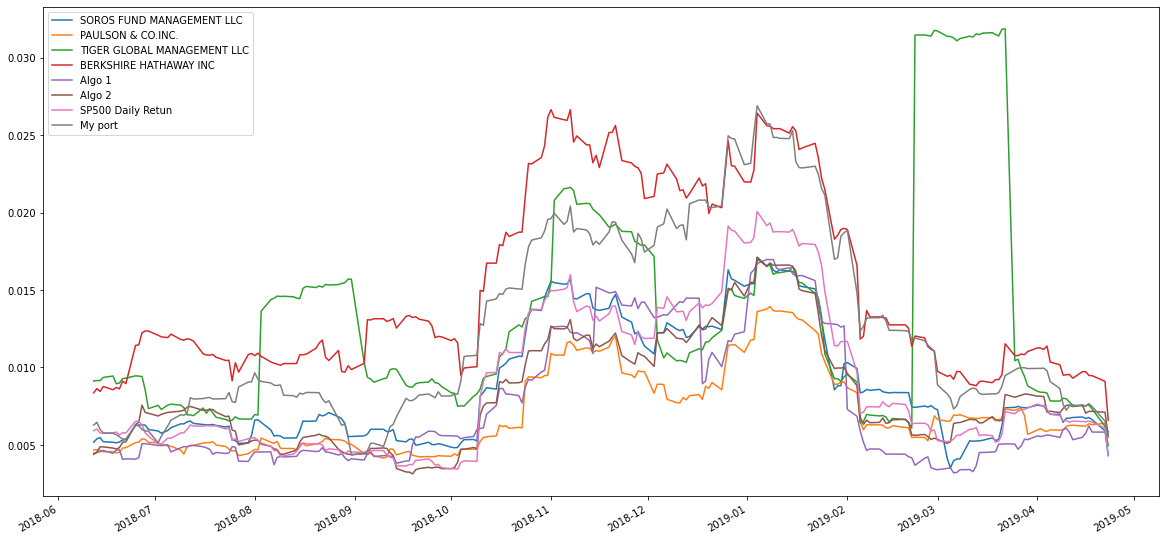

In [143]:
# Calculate rolling standard deviation for 21 days
rolling_ann_std = all_port_ret.rolling(window = 21).std()
# Plot rolling standard deviation
rolling_ann_std.plot(kind = 'line',figsize = (20,10))

### Calculate and plot the correlation

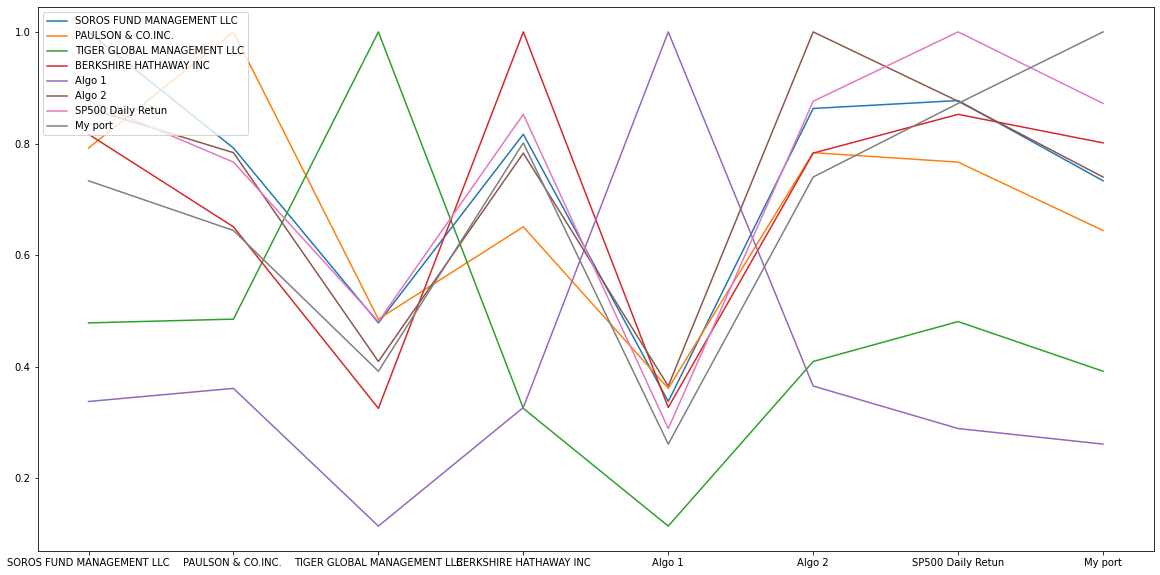

In [138]:
# Calculate and plot the correlation
correlation = all_port_ret.corr()
plot_cus = correlation.plot(kind = 'line', figsize = (20,10) )
plot_cus.legend(loc=2)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

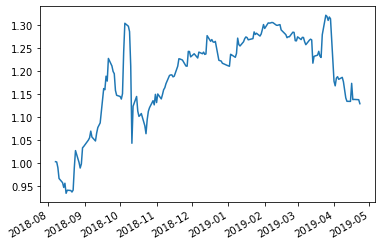

In [134]:
# Calculate and plot Beta for 60 days
cov_all_new_port = all_port_ret['My port'].rolling(window=60).cov(combined_daily_returns['SP500 Daily Retun'])
variance = combined_daily_returns['SP500 Daily Retun'].rolling(window=60).var()
my_port_beta = cov_all_new_port/variance
my_port_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [135]:
# Calculate Annualzied Sharpe Ratios
new_port_annual_sharpe_ratio = (all_port_ret.mean() * 252)/ (all_port_ret.std() * np.sqrt(252))

<AxesSubplot:>

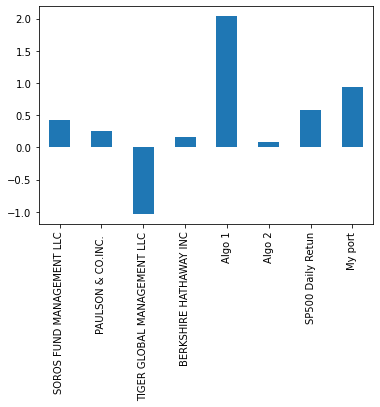

In [136]:
# Visualize the sharpe ratios as a bar plot
new_port_annual_sharpe_ratio.plot(kind = 'bar')

### How does your portfolio do?

Write your answer here!

In [145]:
#My Portfolio did second best sharpe ratio to algo1 which out performed the SP500.Algo 1 has one of the lowest risk vs SP500 
#on the other hand my portfolio has the third highest std(risk) makes it middle of the road risk vs revard.